# Problem 3
## a) 
TRUE, TRUE, FALSE, FALSE

## b)

The leaves remaining when pruning down to 3 leaves would be, 1,5 and 6. In other word the internal nodes left would be "age < 81.5" and "country: ...". This is due to age being the more important predictor, and the split on "age < 46.5" would prove to be less significant than the geographical split, which shows large difference in mortality between France and the east-asian countries..

## c)
### i)

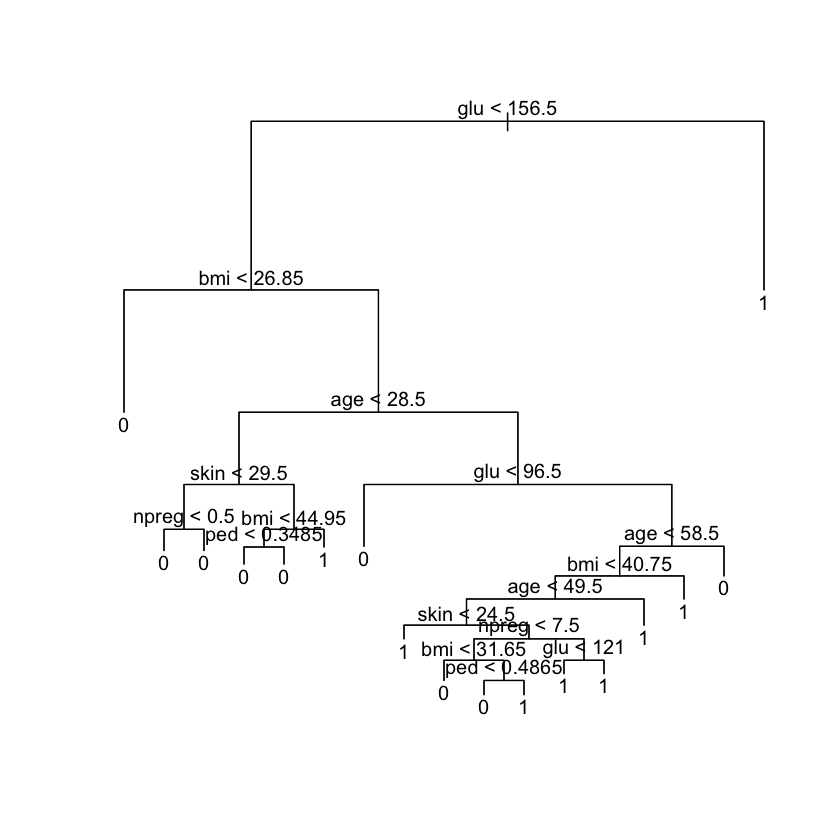

$size
[1] 17 14 10  6  2  1

$dev
[1]  77  78  85  81  82 100

$k
[1]  -Inf  0.00  1.50  2.75  5.00 29.00

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

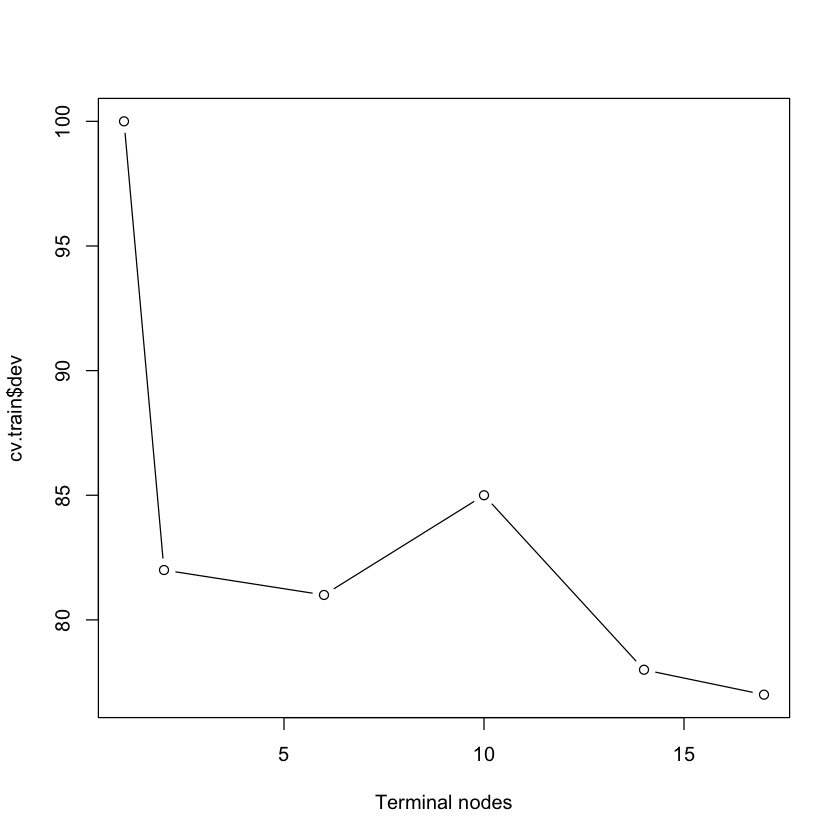

In [77]:

id <- "1Fv6xwKLSZHldRAC1MrcK2mzdOYnbgv0E" # google file ID
d.diabetes <- dget(sprintf("https://docs.google.com/uc?id=%s&export=download", id))
d.train=d.diabetes$ctrain
d.test=d.diabetes$ctest
set.seed(1)
library(tree)

# Creating a simple tree with the training set with default parameters
d.train$diabetes = as.factor(d.train$diabetes) 
ct.train <- tree(diabetes ~ npreg + glu + bp + skin + bmi + ped + age,data=d.train)
plot(ct.train)
text(ct.train)

# Applying cost complexity pruning optimized for low missclassification error

set.seed(1)
cv.train = cv.tree(ct.train, K = 10, FUN = prune.misclass)
plot(cv.train$size,cv.train$dev,type="b",
                   xlab="Terminal nodes")
cv.train


In [78]:
# Using the confusion matrix to calculate the missclassification error
tree.pred = predict(ct.train ,d.test ,type="class")
confMat <- table(tree.pred ,d.test$diabetes)
confMat
1-sum(diag(confMat))/(sum(confMat[1:2,1:2]))

         
tree.pred   0   1
        0 126  28
        1  29  49

[1] 0.2456897

Here we observe that the tree already has the lowest missclassification error $: 24.6\%$ at $17$ terminal nodes,
so there is no need to prune the tree.

### ii)
We will use the tree based method "random forest", as this solves the high variance and non-robustness problems which other prediction models suffer from.

In [88]:
library(randomForest)
set.seed(1)

rf.dtrain = randomForest(diabetes ~. , data=d.train, mtry=4, importance=TRUE, ntree=500)
rf.dtrain




Call:
 randomForest(formula = diabetes ~ ., data = d.train, mtry = 4,      importance = TRUE, ntree = 1000) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 4

        OOB estimate of  error rate: 20%
Confusion matrix:
    0  1 class.error
0 176 24        0.12
1  36 64        0.36

The tuning parameters are $m$, which is the number of predictors to be used in each tree and $B$, which is how many trees the method will average over. As showed in the plot below, we can observe that increasing B to very high values doesn't yield much better performance as it increases to higher values. Hence we end up using the default amount at $B=500$. When choosing $m$ it is recommended to use $m=\sqrt{p}$, where $p$ is the number of predictors, which calculates to $m\approx 3$ in our case. However, $m=4$ yields the lowest missclassification error, hence $m=4$ will be used. When using these parameters the missclassification error is calculated to be $23.7\%$.

       
rf.pred   0   1
      0 133  33
      1  22  44

[1] 0.237069

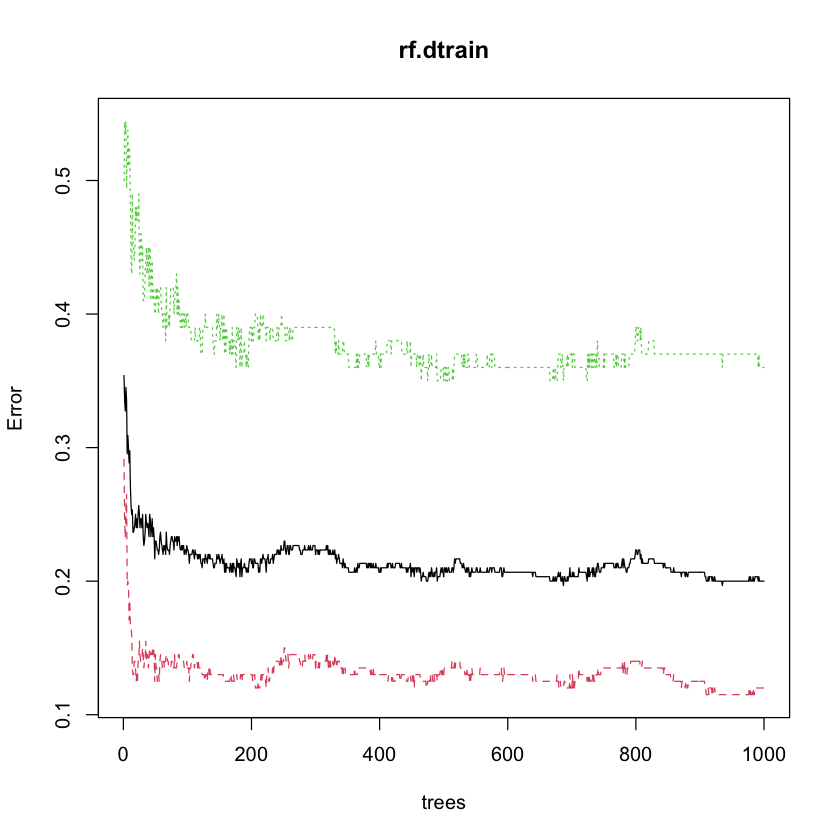

In [89]:
plot(rf.dtrain)
rf.pred = predict(rf.dtrain, newdata=d.test, type='class')
confMat <- table(rf.pred , d.test$diabetes)
confMat
1-sum(diag(confMat))/(sum(confMat[1:2,1:2]))


We can observe that the most important predictors are "glu" and "bmi" as these predictors has the highest mean decrease in Gini index.

,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
npreg,11.625548,-0.008148806,9.899140,10.59424
glu,23.146242,21.708782337,29.208904,36.31708
bp,1.175534,-3.521383614,-1.339085,10.42649
skin,6.025405,4.026271085,7.608086,15.20716
bmi,10.066667,11.660643858,14.975516,23.13038
ped,5.748632,2.499308536,6.131152,19.62586
age,10.824245,3.195409201,11.008964,17.69959


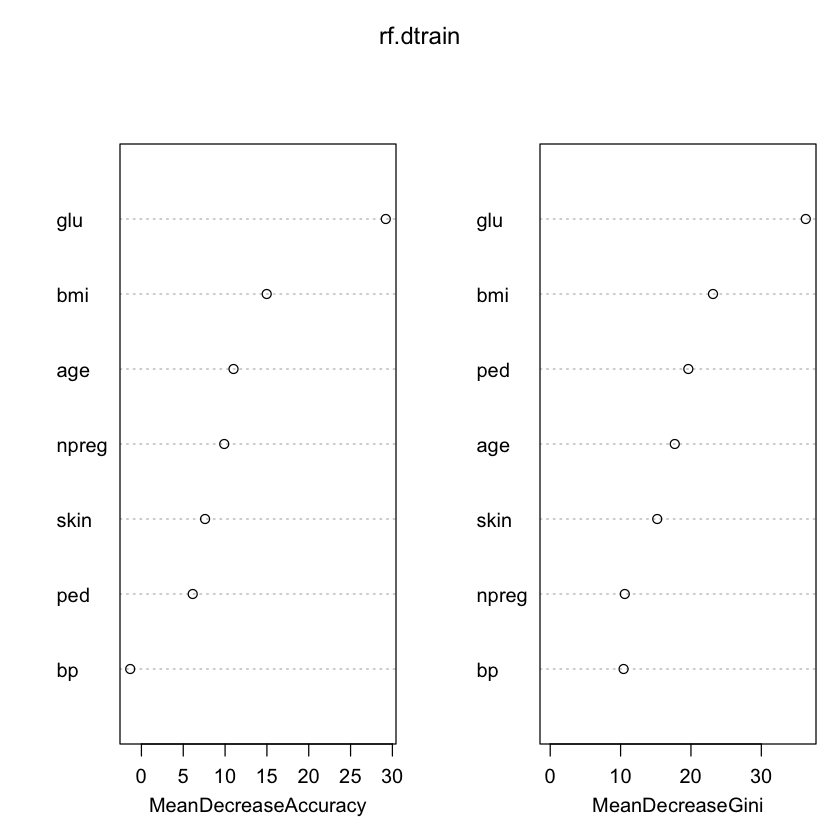

In [81]:
importance(rf.dtrain)
varImpPlot(rf.dtrain)

# 4 c)

\begin{align*}
    K(X,X') &= K(
    \begin{bmatrix} 
    X_1\\
    X_2
    \end{bmatrix}
    ,
    \begin{bmatrix} 
    X_1'\\
    X_2'
    \end{bmatrix}
    )\\
    &= (1 + X^TX')^2\\
    &= 1 + X_2^2X_2'^2 + 2X_1X_2X_1'X_2' + 2X_2X_2' +2X_1X_1' +X_1'^2X_2'^2\\
    &= \underbrace{\begin{bmatrix} 
    X_1^2 &
    X_2^2 &
    \sqrt{2}X_1X_2 &
    \sqrt{2}X_1 &
    \sqrt{2}X_2 &
    1
    \end{bmatrix}}_{h^T(X)}
    \underbrace{\begin{bmatrix} 
    X_1'^2 \\
    X_2'^2 \\
    \sqrt{2}X_1'X_2' \\
    \sqrt{2}X_1' \\
    \sqrt{2}X_2' \\
    1
    \end{bmatrix}}_{h(X')}\\
    &= \langle h(X'), h(X')  \rangle\\
    h(X) &= \begin{bmatrix} 
    X_1^2 \\
    X_2^2 \\
    \sqrt{2}X_1X_2 \\
    \sqrt{2}X_1\\
    \sqrt{2}X_2 \\
    1
    \end{bmatrix}
\end{align*}